In [1]:
%matplotlib inline
import librosa
import numpy as np
import os
import sys
import re
import argparse
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inpath='/media/alvin/disk_D/dataset/HeartBeat' #the path of training files
HBdb = pd.DataFrame(columns=['sid','dbset','dbtype','fname','noise','dur','sr','wav_raw'])

In [3]:
medset_pascal  = ['/Atrain/Atraining_normal/',
           '/Atrain/Atraining_murmur/',
           '/Atrain/Atraining_extrahls/',
           '/Atrain/Atraining_artifact/',
           '/Atrain/Aunlabelledtest/',
           '/Btrain/Training B Normal/',
           '/Btrain/Btraining_murmur/',
           '/Btrain/Btraining_extrastole/',
           '/Btrain/Bunlabelledtest/',
           '/Btrain/Btraining_noisynormal/',
           '/Btrain/Btraining_noisymurmur/']

medset_physionet  = ['/training/training-a/',
                     '/training/training-b/',
                     '/training/training-c/',
                     '/training/training-d/',
                     '/training/training-e/',
                     '/training/training-f/',
                     '/validation/']

In [19]:
# 要處理的wave路徑，唯一要改的是這裡
#medset = medset_pascal
medset = medset_physionet

if medset == medset_pascal:
    inpath += '/pascal'
    o_pd_name = 'HBdb_pascal'
    bin_num   = 25
else:
    inpath += '/physionet'
    o_pd_name = 'HBdb_physionet'
    bin_num   = 125
    
HBdb = pd.read_pickle(o_pd_name)
HBdb_wo_noisy = HBdb[HBdb['noise']==0]

In [12]:
dbset  = HBdb.dbset.unique()
dbtype = HBdb.dbtype.unique()

for each_type in dbtype:
    set_name = HBdb[HBdb['dbtype']==each_type]['dbset'].unique()
    type_num = HBdb[HBdb['dbtype']==each_type]['dur'].shape[0]
    dur_avg  = HBdb[HBdb['dbtype']==each_type]['dur'].mean()
    dur_max  = HBdb[HBdb['dbtype']==each_type]['dur'].max()
    dur_min  = HBdb[HBdb['dbtype']==each_type]['dur'].min()
    print('(%4s)%-10s  %-24s\t%2.2fs\tmax=%2.2f\tmin=%2.2f'%(type_num,set_name[0],each_type,dur_avg,dur_max,dur_min))

global_dur_avg = HBdb['dur'].mean()
global_dur_max = HBdb['dur'].max()
global_dur_min = HBdb['dur'].min()

print('\nglobal average duration =%2.2fs\tmax=%2.2f\tmin=%2.2f'%(global_dur_avg,global_dur_max,global_dur_min))

global_dur_avg = HBdb_wo_noisy['dur'].mean()
global_dur_max = HBdb_wo_noisy['dur'].max()
global_dur_min = HBdb_wo_noisy['dur'].min()
print('\n【skip noisy data】')
print('global average duration =%2.2fs\tmax=%2.2f\tmin=%2.2f'%(global_dur_avg,global_dur_max,global_dur_min))


( 409)training    training-a              	32.59s	max=36.50	min=9.27
( 490)training    training-b              	7.98s	max=8.00	min=5.31
(  31)training    training-c              	49.44s	max=122.00	min=9.65
(  55)training    training-d              	15.15s	max=48.54	min=6.61
(2141)training    training-e              	23.07s	max=101.67	min=8.06
( 114)training    training-f              	33.12s	max=59.62	min=29.38
( 301)validation                          	21.09s	max=122.00	min=5.31

global average duration =22.35s	max=122.00	min=5.31

【skip noisy data】
global average duration =22.35s	max=122.00	min=5.31


In [13]:
dbtype

array(['training-a', 'training-b', 'training-c', 'training-d',
       'training-e', 'training-f', ''], dtype=object)

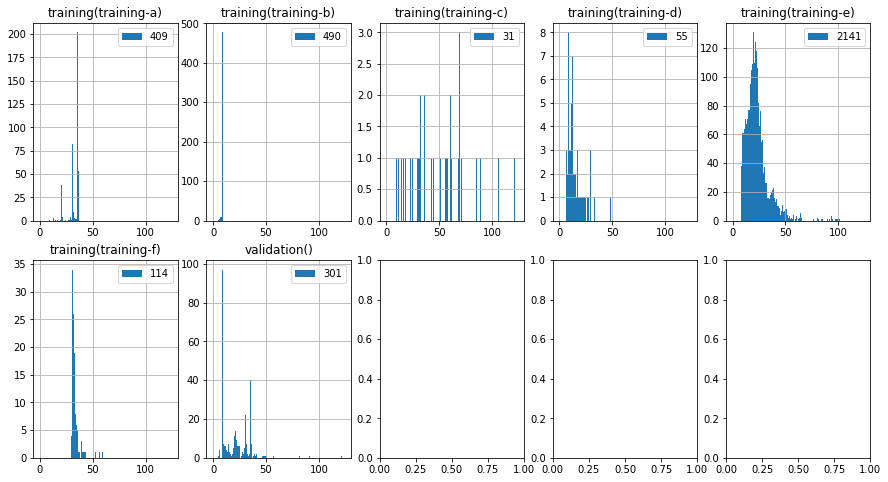

In [20]:
dbset  = HBdb.dbset.unique()
dbtype = HBdb.dbtype.unique()

fig,ax = plt.subplots(2,5,figsize=(15,8))
sub_plot_idx = 0
for each_type in dbtype:
    if(re.search('noisy',each_type)): continue
    set_name = HBdb[HBdb['dbtype']==each_type]['dbset'].unique()
    
    sub_plot_idx +=1
    ax0 = plt.subplot(2,5,sub_plot_idx)
    ax0.set_title(set_name[0]+'('+each_type +')')
    
    type_dur_list = HBdb[HBdb['dbtype']==each_type]['dur']
    type_dur_list.hist(bins=range(bin_num),ax=ax0)
    ax0.legend([str(type_dur_list.count())])    
    